# Show how the sampling is done in 2d

In [1]:
%matplotlib inline
#%matplotlib notebook
%load_ext version_information
%load_ext autoreload


In [2]:
import datetime
import os
import sys
import warnings

warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import spacepy.datamodel as dm
import spacepy.plot as spp
import spacepy.toolbox as tb
import tqdm
import pymc3 as mc3
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib import animation, rc


%version_information matplotlib, numpy, pandas


Bad key "axes.color_cycle" on line 17 in
/Users/balarsen/.local/lib/python3.6/site-packages/spacepy/data/spacepy.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


Software versions
Python 3.6.4 64bit [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
IPython 6.4.0
OS Darwin 15.6.0 x86_64 i386 64bit
matplotlib 2.2.2
numpy 1.14.3
pandas 0.23.0
Thu May 17 15:16:47 2018 MDT

In [3]:
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['savefig.dpi'] = plt.rcParams['figure.dpi'] # 72
%config InlineBackend.figure_format = 'retina'

In [12]:
with mc3.Model():
    mean = mc3.Uniform('mean', -10, 10)
    std = mc3.Uniform('std', 0, 20)
    A = mc3.Normal('A', mean, std, observed=np.random.normal(loc=0, scale=10, size=20))
    trace = mc3.sample(1000, discard_tuned_samples=False)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [std_interval__, mean_interval__]
100%|██████████| 1500/1500 [00:01<00:00, 1037.11it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1129ba6a0>,
      dtype=object)

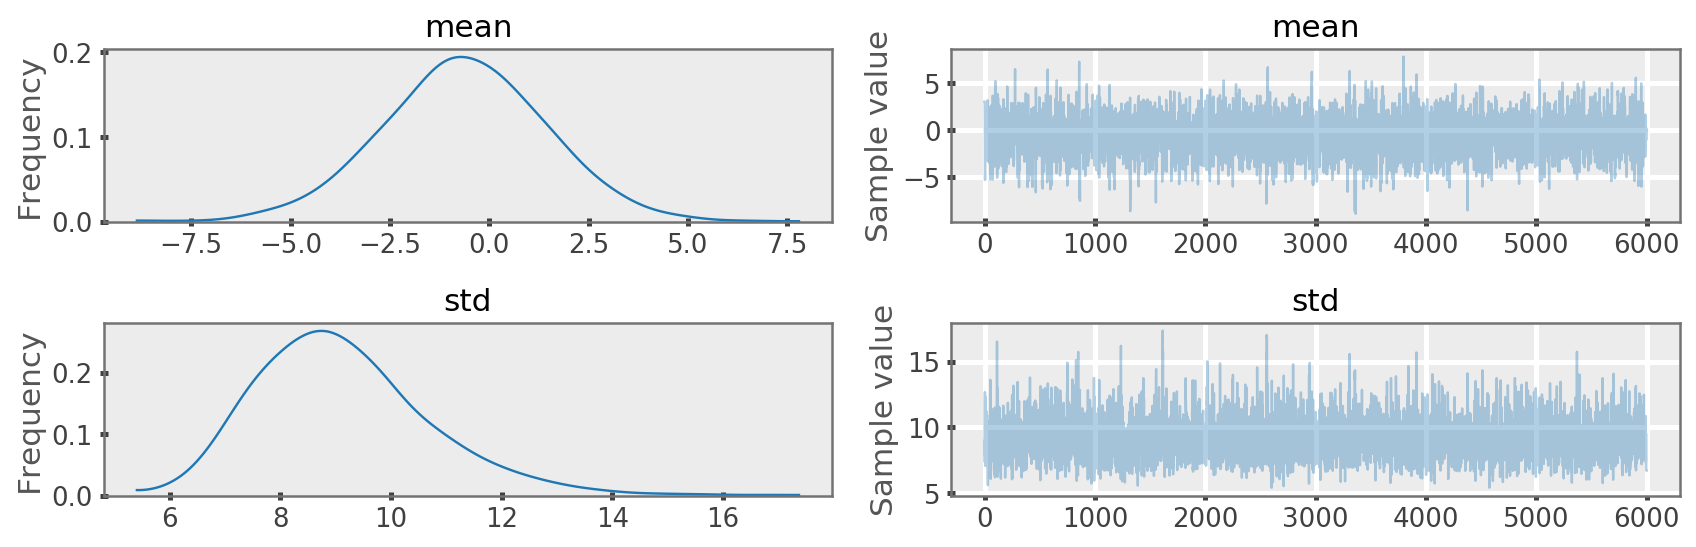

In [13]:
mc3.traceplot(trace, combined=True)

In [14]:
len(trace)

1500

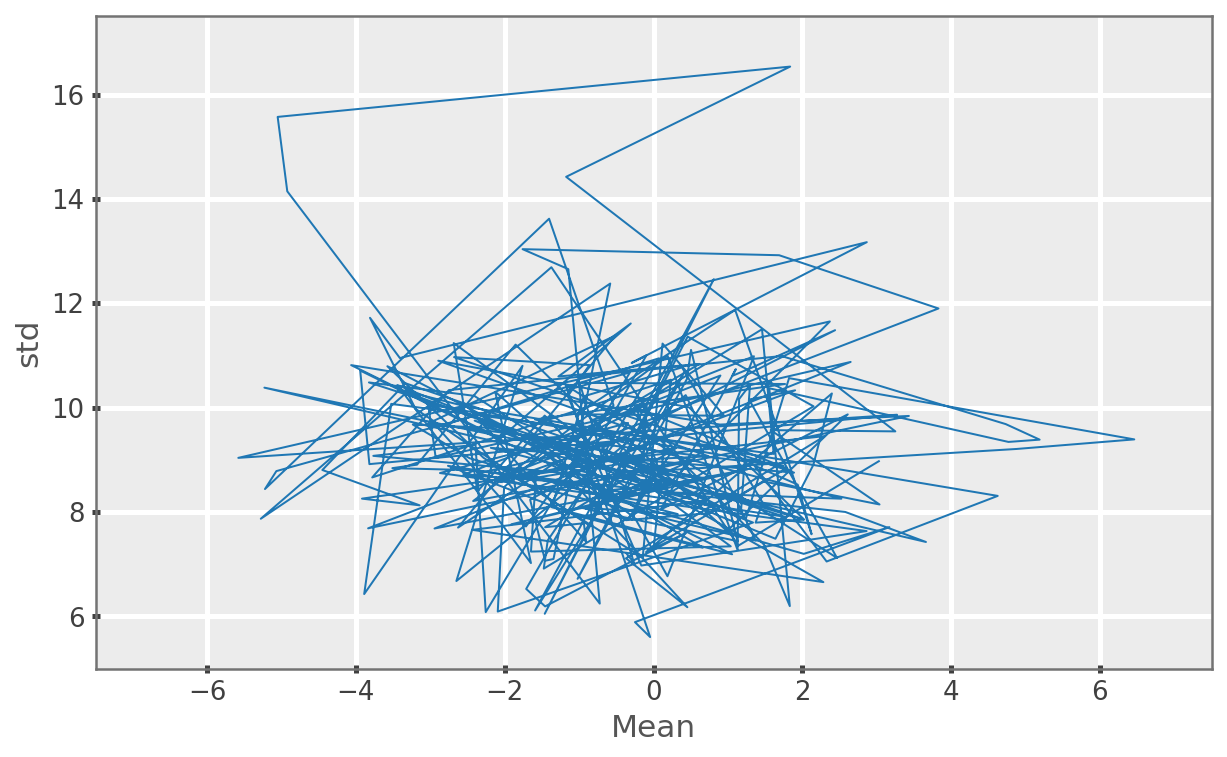

In [22]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( -7.5, 7.5))
ax.set_ylim((5, 17.5))

line, = ax.plot([], [], lw=1,)
ax.set_xlabel('Mean')
ax.set_ylabel('std')
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)
# animation function. This is called sequentially
def animate(i):
    x = trace['mean'][:i]
    y = trace['std'][:i]
    line.set_data(x, y)
    return (line,)
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=300, interval=50, blit=True)
HTML(anim.to_html5_video())